In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datetime
import tensorflow as tf

In [13]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

train_x = train_x.astype(np.float32) / 255.
test_x = test_x.astype(np.float32) / 255.

train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 1) int32
(10000, 1) int32


In [14]:
train_x.shape

(50000, 32, 32, 3)

In [16]:
classes={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

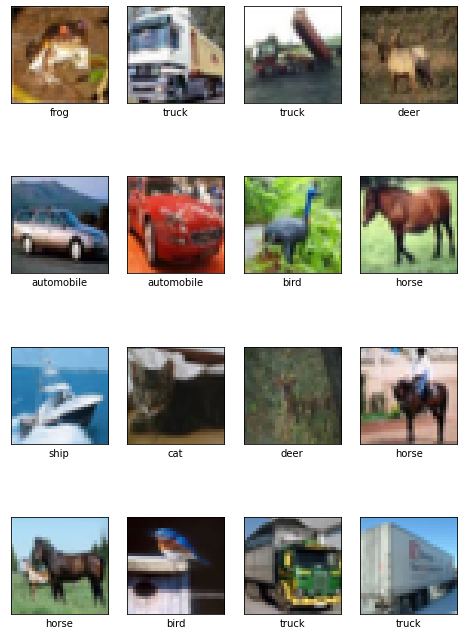

In [17]:
some_samples = train_x[:16, ...]

fig = plt.figure(figsize=(8, 12))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 4, j+1)
    ax.imshow(some_samples[j,...])
    plt.xlabel(classes[train_y[j][0]])
    plt.xticks([]), plt.yticks([])
plt.show()

In [89]:
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
#    elif epoch < 20:
#        return lr * 0.96
    else:
        return lr * 0.98

In [51]:
class Model(tf.keras.Model):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.drop=tf.keras.layers.Dropout(0.2)
        self.norm=tf.keras.layers.LayerNormalization()
        self.conv1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')
        self.conv11 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')
        self.conv2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')
        self.conv22 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')        
        self.conv3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')
        self.conv33 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')        
        self.fc1 = tf.keras.layers.Dense(256, activation='relu')
        self.fc2 = tf.keras.layers.Dense(64, activation='relu')
        self.fc3 = tf.keras.layers.Dense(10, activation='softmax')
        self.max_pool = tf.keras.layers.MaxPooling2D((2, 2), (2, 2))
        self.flatten = tf.keras.layers.Flatten()
        
    def call(self, inp):

        out = self.drop(self.conv3(inp))
        out = self.conv33(out)
        x = self.max_pool(out)
        out = self.drop(self.conv2(x))
        out = tf.concat([self.conv22(out), x], axis=3)
        y = self.max_pool(out)
        out = self.drop(self.conv1(y))
        out = tf.concat([self.conv11(out), y], axis=3)
        out = self.max_pool(out)
        out = self.flatten(out)
        out = self.drop(self.fc1(out))
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out
    
model = Model()

In [52]:

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
es_callback=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=4, verbose=0,restore_best_weights=True
)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.fit(train_x,train_y,validation_data=(test_x, test_y), epochs=30, batch_size=100,callbacks=[lr_callback,es_callback])

Epoch 1/30
500/500 [==============================] - 153s 303ms/step - loss: 1.5324 - accuracy: 0.4387 - val_loss: 1.2297 - val_accuracy: 0.5579
Epoch 2/30
500/500 [==============================] - 149s 298ms/step - loss: 1.0601 - accuracy: 0.6230 - val_loss: 0.9393 - val_accuracy: 0.6736
Epoch 3/30
500/500 [==============================] - 153s 305ms/step - loss: 0.8944 - accuracy: 0.6842 - val_loss: 0.8426 - val_accuracy: 0.6992
Epoch 4/30
500/500 [==============================] - 158s 315ms/step - loss: 0.7940 - accuracy: 0.7178 - val_loss: 0.8017 - val_accuracy: 0.7171
Epoch 5/30
500/500 [==============================] - 152s 304ms/step - loss: 0.7348 - accuracy: 0.7426 - val_loss: 0.7457 - val_accuracy: 0.7383
Epoch 6/30
500/500 [==============================] - 152s 304ms/step - loss: 0.6760 - accuracy: 0.7602 - val_loss: 0.6957 - val_accuracy: 0.7599
Epoch 7/30
500/500 [==============================] - 152s 304ms/step - loss: 0.6280 - accuracy: 0.7779 - val_loss: 0.7029 -

In [116]:
def test_pict(sample):
    
    prediction = model(sample[None, ...])[0]
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample)
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted class: {}'.format(classes[ans]))

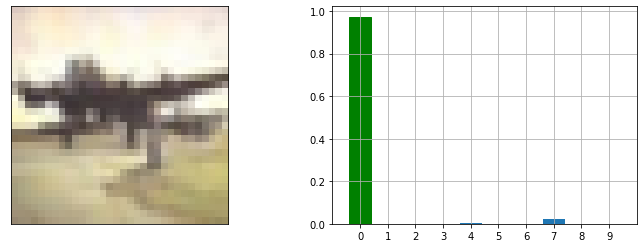

Predicted class: airplane
True Answer: airplane


In [118]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
test_pict(sample)

print('True Answer: {}'.format(classes[test_y[idx][0]]))